In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42

sns.set_context('talk')
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [2]:
data = pd.read_csv("./data/data_prep_reg.csv", index_col=[0])

In [5]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,0,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,0,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,0,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833


In [6]:
data.shape

(15539, 44)

In [13]:
y = data["target"]
X=data.drop(["target"], axis= 1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                         y,
                                         test_size = 0.3, 
                                         random_state = RSEED)

In [16]:
X_train.columns

Index(['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp', 'var_temp',
       'median_temp', 'ptp_temp', 'max_precip', 'min_precip', 'mean_precip',
       'std_precip', 'var_precip', 'median_precip', 'ptp_precip',
       'max_rel_humidity', 'min_rel_humidity', 'mean_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'ptp_rel_humidity', 'max_wind_dir', 'min_wind_dir', 'mean_wind_dir',
       'std_wind_dir', 'var_wind_dir', 'median_wind_dir', 'ptp_wind_dir',
       'max_wind_spd', 'min_wind_spd', 'mean_wind_spd', 'std_wind_spd',
       'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd', 'max_atmos_press',
       'min_atmos_press', 'mean_atmos_press', 'std_atmos_press',
       'var_atmos_press', 'median_atmos_press', 'ptp_atmos_press'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=StandardScaler()

col_scale = ['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp', 'var_temp',
       'median_temp', 'ptp_temp', 'max_precip', 'min_precip', 'mean_precip',
       'std_precip', 'var_precip', 'median_precip', 'ptp_precip',
       'max_rel_humidity', 'min_rel_humidity', 'mean_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'ptp_rel_humidity', 'max_wind_dir', 'min_wind_dir', 'mean_wind_dir',
       'std_wind_dir', 'var_wind_dir', 'median_wind_dir', 'ptp_wind_dir',
       'max_wind_spd', 'min_wind_spd', 'mean_wind_spd', 'std_wind_spd',
       'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd', 'max_atmos_press',
       'min_atmos_press', 'mean_atmos_press', 'std_atmos_press',
       'var_atmos_press', 'median_atmos_press', 'ptp_atmos_press']
       
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_test_scaled = scaler.transform(X_test[col_scale])

In [67]:
from sklearn.svm import SVR

regressor = SVR(kernel= "rbf")
regressor.fit(X_train_scaled,y_train)


SVR()

In [21]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [71]:
y_pred_train = regressor.predict(X_train_scaled)
y_pred_test = regressor.predict(X_test_scaled)

In [72]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

In [73]:
display(rmse_train, rmse_test)

40.1279776907557

41.39794647052387

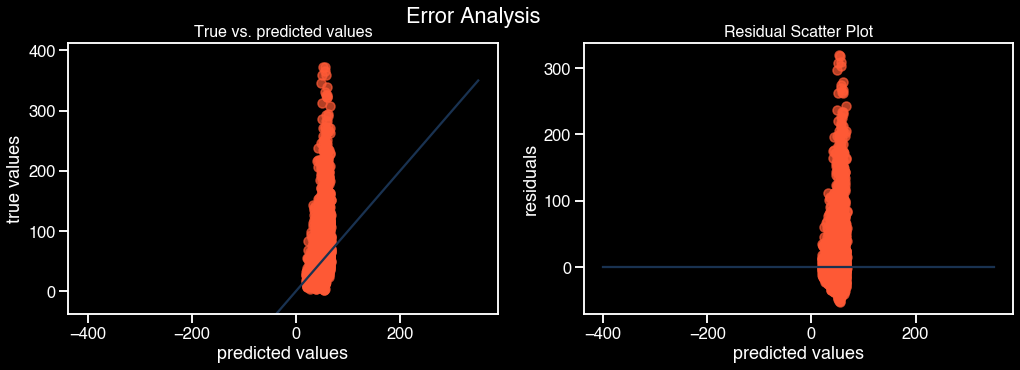

In [74]:
error_analysis(y_test, y_pred_test)

## hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [115]:
parameters = {#'C':np.arange(8.5, 10, 0.05),                               
              'cache_size' : np.arange(100, 300, 25),               
              #'coef0' : np.arange(15, 25, 1),
              #"degree": np.arange(1, 5, 1),
             #"epsilon": np.arange(0.1, 10, 0.5), 
            #'gamma': ['scale','auto'],
            #'max_iter': -1,
             #'shrinking': [True,False],
            #'tol' : np.arange(0.001, 0.01, 0.001),
            #"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
             } 


In [116]:
gs = GridSearchCV(SVR(kernel="rbf",C= 9.95, gamma= 'auto', shrinking= True,epsilon =9.6, tol=0.009 ), parameters, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

In [113]:
gs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 5/5] END ...........................C=8.5;, score=-43.244 total time=  12.9s
[CV 2/5] END ..........................C=8.55;, score=-42.028 total time=  12.9s
[CV 2/5] END ...........................C=8.5;, score=-42.033 total time=  13.3s
[CV 3/5] END ...........................C=8.5;, score=-43.031 total time=  13.4s
[CV 1/5] END ..........................C=8.55;, score=-39.840 total time=  13.4s
[CV 1/5] END ...........................C=8.5;, score=-39.844 total time=  13.5s
[CV 3/5] END ..........................C=8.55;, score=-43.027 total time=  13.6s
[CV 4/5] END ...........................C=8.5;, score=-42.650 total time=  13.6s
[CV 5/5] END ..........................C=8.55;, score=-43.239 total time=  13.7s
[CV 4/5] END ..........................C=8.55;, score=-42.645 total time=  13.7s
[CV 2/5] END .............C=8.600000000000001;, score=-42.023 total time=  13.9s
[CV 3/5] END .............C=8.600000000000001;,

GridSearchCV(cv=5, estimator=SVR(epsilon=9.6, gamma='auto', tol=0.009),
             n_jobs=-1,
             param_grid={'C': array([8.5 , 8.55, 8.6 , 8.65, 8.7 , 8.75, 8.8 , 8.85, 8.9 , 8.95, 9.  ,
       9.05, 9.1 , 9.15, 9.2 , 9.25, 9.3 , 9.35, 9.4 , 9.45, 9.5 , 9.55,
       9.6 , 9.65, 9.7 , 9.75, 9.8 , 9.85, 9.9 , 9.95])},
             scoring='neg_root_mean_squared_error', verbose=5)

In [114]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -42.03
Best parameters: {'C': 9.95000000000002}


In [126]:
SVR_opt= SVR(kernel="rbf",C= 9.95, gamma= 'auto', degree=3,shrinking= True,epsilon =9.6, tol=0.009 )

In [127]:
SVR_opt.fit(X_train_scaled, y_train)

SVR(C=9.95, epsilon=9.6, gamma='auto', tol=0.009)

In [128]:
y_pred_train = SVR_opt.predict(X_train_scaled)
y_pred_test = SVR_opt.predict(X_test_scaled)


In [129]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

In [133]:
display(rmse_train, rmse_test)

37.47692576136117

38.86384600478296

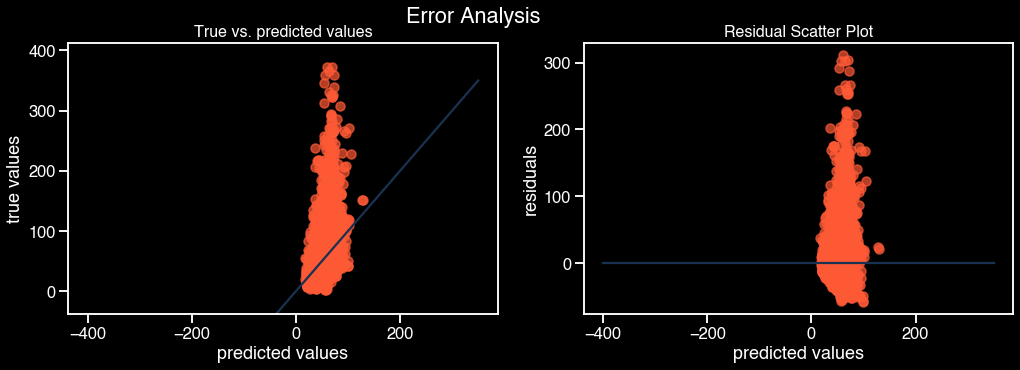

In [130]:
error_analysis(y_test, y_pred_test)

## Location D

In [146]:
data_d = pd.read_csv("./data/data_prep_reg_d.csv", index_col=[0])


In [147]:
y = data_d["target"]
X=np.array(data_d.drop(["target"], axis= 1),ndmin=2)

In [148]:
from sklearn.model_selection import train_test_split

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X,
                                         y,
                                         test_size = 0.3, 
                                         random_state = RSEED)

In [151]:
y_train_d

9105      71.211111
4420      64.459362
7083      51.509565
2504      47.952727
4035      59.057955
            ...    
13711    141.369348
1471     107.599787
9609      60.110000
11752     49.984348
2669      53.832222
Name: target, Length: 3493, dtype: float64

In [152]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=StandardScaler()

col_scale = ['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp', 'var_temp',
       'median_temp', 'ptp_temp', 'max_precip', 'min_precip', 'mean_precip',
       'std_precip', 'var_precip', 'median_precip', 'ptp_precip',
       'max_rel_humidity', 'min_rel_humidity', 'mean_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'ptp_rel_humidity', 'max_wind_dir', 'min_wind_dir', 'mean_wind_dir',
       'std_wind_dir', 'var_wind_dir', 'median_wind_dir', 'ptp_wind_dir',
       'max_wind_spd', 'min_wind_spd', 'mean_wind_spd', 'std_wind_spd',
       'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd', 'max_atmos_press',
       'min_atmos_press', 'mean_atmos_press', 'std_atmos_press',
       'var_atmos_press', 'median_atmos_press', 'ptp_atmos_press']
       
X_train_scaled_d = scaler.fit_transform(X_train_d[col_scale])
X_test_scaled_d = scaler.transform(X_test_d[col_scale])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices